<a href="https://colab.research.google.com/github/Rounak-Das-02/Walmart-Price-Prediction/blob/master/Walmart%20price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
!git clone https://github.com/RAHULKASHYAP02/WALMART-STORE-SALES-PREDICTION-FORECASTING.git

fatal: destination path 'WALMART-STORE-SALES-PREDICTION-FORECASTING' already exists and is not an empty directory.


In [0]:
train = pd.read_csv("/content/WALMART-STORE-SALES-PREDICTION-FORECASTING/data/train.csv")

In [109]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [0]:
train["year"] = pd.to_datetime(train["Date"]).dt.year
train["month"] = pd.to_datetime(train["Date"]).dt.month
train["day"] = pd.to_datetime(train["Date"]).dt.day

In [0]:
readl_date = np.array(train["Date"].head(20))
train = train.drop("Date" ,axis = 1)

In [0]:
target = train.Weekly_Sales

In [0]:
train = train.drop("Weekly_Sales" , axis = 1)

In [17]:
train .head()

,Store,Dept,IsHoliday,year,month,day
0,1,1,False,2010,2,5
1,1,1,True,2010,2,12
2,1,1,False,2010,2,19
3,1,1,False,2010,2,26
4,1,1,False,2010,3,5


In [0]:
x_train , x_test , y_train , y_test = train_test_split(train , target , test_size = 0.2)

In [0]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
rfr = RandomForestRegressor()
rfr.fit(x_train , y_train)
y_pred = rfr.predict(x_test)
print(r2_score(y_test , y_pred))


0.9755658749905282


In [74]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [76]:
joblib.dump(rfr , "model.pkl")

['model.pkl']

In [0]:
import matplotlib.pyplot as plt
from sklearn.externals import joblib

In [0]:
model = joblib.load("/content/model.pkl")
test = pd.read_csv("/content/WALMART-STORE-SALES-PREDICTION-FORECASTING/data/test.csv")

In [80]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [0]:
test["year"] = pd.to_datetime(test["Date"]).dt.year
test["month"] = pd.to_datetime(test["Date"]).dt.month
test["day"] = pd.to_datetime(test["Date"]).dt.day

In [82]:
test.head()

,Store,Dept,Date,IsHoliday,year,month,day
0,1,1,2012-11-02,False,2012,11,2
1,1,1,2012-11-09,False,2012,11,9
2,1,1,2012-11-16,False,2012,11,16
3,1,1,2012-11-23,True,2012,11,23
4,1,1,2012-11-30,False,2012,11,30


In [0]:
Date = np.array((test["Date"].head(20)))
test = test.drop("Date" , axis =1)

In [0]:
test = test.head(20)

In [0]:
output = model.predict(x_train)

In [0]:
output = output[:20]

In [126]:
output.shape

(20,)

In [127]:
readl_date.shape

(20,)

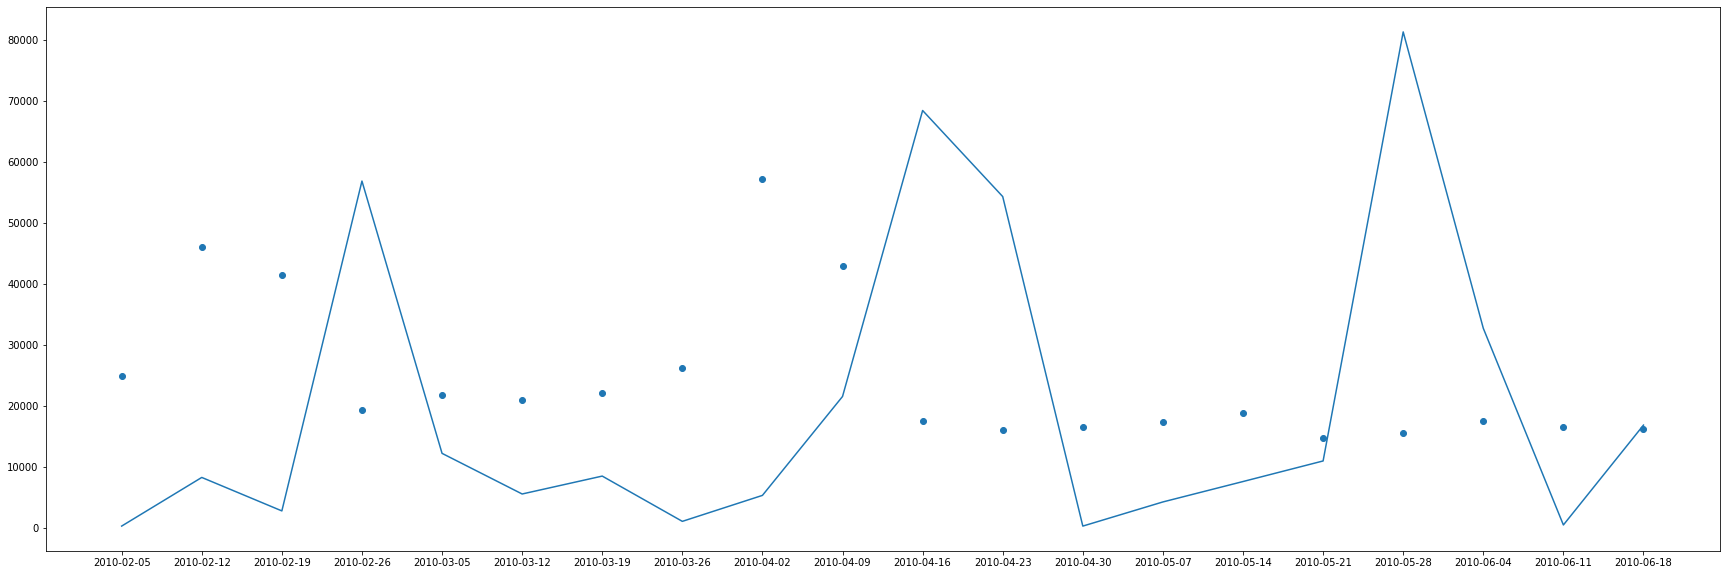

In [129]:
plt.figure(0 , figsize=[30 , 10])
plt.plot(readl_date , output)
plt.scatter(readl_date , target.head(20))
plt.show()